# Alteryx X IPython Demo: 
# Deep Learn NLP Airline Sentiment Classification

### 2018 
#### Internal reference only

### Agenda

**Part 1 Encode_Vectorizer**
- 1.1 Background
- 1.2 Encoding
- 1.3 Encode with Sckit Learn
- 1.4 One Hot Encoding with Kera 
- 1.5 Vectorize Text with Count & TF-IDF
- 1.6 Word Embeding 

**Part 2: Simple Demo using Keras**
- 2.1 Sequence Length with Paddling
- 2.2 Neural Netork Model

**Part 3: Airline Twitter Sentiment Analysis**
- 3.1 Import Data to Alteryx 
- 3.2 Vizualizing Data Understanding
- 3.3 Data Preprocessing Tf-IDF Vectorizer
- 3.4 Data Transformation Stop Word Removal
- 3.5 Model Training: Keras CNN
- 3.6 Model Evaluation with Graph


**Part 4: Scoring & Export Alteryx Output (To be Built)**
- 4.1 Scoring Data Import & Prep
- 4.2 Predict New Data with Built Model
- 4.3 Write to Alteryx output



# 1.1 Background

### Problem Description
Given dataset contains data of tweets on various airline’s twitter handles.

It contains a total of 12 columns, out of which one column specifies the sentiment of the tweet. All other columns provide various information related to what was the tweet, where was it posted from, when was it posted, it's retweeted; etc.

Before we goes into the real data analysis. It's crucial to understand what's the difference between traditional NLP & deep learning based NLP technique. 

Lets start with encoding. If audience have the experience, jump to Part 3

# 1.2 Encoding

A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

## Why Use a One Hot Encoding?

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

## Integer Encoding
We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

# 1.3 Encode with Sckit Learn
Now that we have seen how to roll our own one hot encoding from scratch, let’s see how we can use the scikit-learn library to perform this mapping automatically for cases where the input sequence fully captures the expected range of input values:

cold, cold, warm, cold, hot, hot, warm, cold, warm, hot

In [20]:
from ayx import Alteryx

In [2]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 1.4 One Hot Encoding with Kera 

You may have a sequence that is already integer encoded.

You could work with the integers directly, after some scaling. Alternately, you can one hot encode the integers directly. This is important to consider if the integers do not have a real ordinal relationship and are really just placeholders for labels.

The Keras library offers a function called to_categorical() that you can use to one hot encode integer data.

In this example, we have 4 integer values [0, 1, 2, 3] and we have the input sequence of the following 10 numbers:

In [4]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

[1 3 2 0 3 2 2 1 0 1]
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
1


# 1.5 Vectorize Text with Count & TF-IDF

#### Word Counts with CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

Because these vectors will contain a lot of zeros, we call them sparse. Python provides an efficient way of handling sparse vectors in the scipy.sparse package.

The vectors returned from a call to transform() will be sparse vectors, and you can transform them back to numpy arrays to look and better understand what is going on by calling the toarray() function.

Below is an example of using the CountVectorizer to tokenize, build a vocabulary, and then encode a document.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [6]:
print(vectorizer.vocabulary_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}


#### TF-IDF Vectorizer

Word counts are a good starting point, but are very basic.

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.
Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

The same create, fit, and transform process is used as with the CountVectorizer.

Below is an example of using the TfidfVectorizer to learn vocabulary and inverse document frequencies across 3 small documents and then encode one of those documents.m

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


# 1.6 Word Embeding 

## Word Embedding Model
Recently, the field of natural language processing has been moving away from bag-of-word models and word encoding toward word embeddings. The benet of word embeddings is that they encode each word into a dense vector that captures something about its relative meaning within the training text. This means that variations of words like case, spelling, punctuation, and so on will automatically be learned to be similar in the embedding space.

Word embedding is an approach to provide a ** dense vector representation ** of words that capture
something about their meaning. 

Word embeddings are an improvement over simpler bag-of-word
model word encoding schemes like word counts and frequencies that result in ** large and sparse
vectors (mostly 0 values) ** that describe documents but not the meaning of the words.


Word embeddings work by using an algorithm to train a set of ** fixed-length dense ** and
** continuous-valued vectors ** based on a large corpus of text. Each word is represented by a
point in the embedding space and these points are learned and moved around based on the
words that surround the target word. 



## Gensim
Gensim is an open source Python library for natural language processing, with a focus on topic
modeling. It is billed as \topic modeling for humans". Gensim was developed and is maintained
by the Czech natural language processing researcher Radim Rehurek. Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding
for learning new word vectors from text.

## Word2Vec

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two
main training algorithms that can be used to learn the embedding from text; they are 

$$ Continuous-Bag-of-Words(CBOW) $$

$$ Skip grams $$

The approach was developed by Tomas Mikolov, formerly at Google
and currently at Facebook.



In [8]:
import gensim

c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


There are many parameters on this constructor; a few noteworthy arguments you may
wish to configure are:


- **size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

- **window**: (default 5) The maximum distance between a target word and words around the target word.

- **min count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **workers**: (default 3) The number of threads to use while training.

- **sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

In [9]:
from gensim.models import Word2Vec

#defining data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

print (model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)



Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [10]:
# access vector for one word
print(model['sentence'])

[-3.8356143e-03  2.6241206e-03 -2.6326408e-03  4.9934331e-03
  3.6083485e-03 -3.7597676e-03 -3.2891731e-03  2.8770505e-03
 -6.6597533e-04 -4.5987233e-03  3.9679725e-03 -1.6033417e-03
  2.2782211e-03  3.1302827e-03  4.4241641e-03  9.9996454e-04
 -6.0933258e-04  1.1934254e-03 -1.6515575e-03 -3.6736366e-03
  1.6249379e-03  4.0996936e-03 -4.1315584e-03 -1.4344060e-03
 -1.6795465e-03  1.7544887e-03 -1.8082654e-04  4.0196883e-03
  3.4584308e-03  4.5585642e-03  3.3000770e-03  4.4209552e-03
  8.4573368e-04 -4.9375976e-03  2.3273893e-03 -5.5210089e-04
 -4.4988771e-03  1.7074997e-03  2.5048724e-03  4.2577743e-04
  3.1793001e-03  1.7856068e-03 -2.6392415e-03 -2.7864266e-03
 -2.3437268e-03 -1.2517319e-03  8.5062062e-04  1.5648544e-03
 -1.8960942e-03 -3.0372955e-03  3.8833288e-03  9.9309755e-04
  4.2146165e-03 -2.5570269e-03 -1.2101543e-03 -3.3310337e-03
  3.7262319e-03 -3.8608843e-03  3.1791441e-04 -3.1110307e-03
 -1.7134032e-03 -1.2866281e-03  4.1078450e-03  3.6182339e-04
  3.2596779e-04  1.13933

c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [11]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


# Part 2: Simple Demo using Keras (Optional) 
In this section, we will look at how we can learn a word embedding while tting a neural
network on a text classication problem. We will dene a small problem where we have 10
text documents, each with a comment about a piece of work a student submitted. Each text
document is classied as positive 1 or negative 0. This is a simple sentiment analysis problem.
First, we will dene the documents and their class labels.

In [12]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

In [13]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Next, we can ** integer encode ** each document. 

This means that as input the Embedding layer will have sequences of integers. 

We could experiment with other more sophisticated bag of word model encoding like counts or ** TF-IDF **. 

Keras provides the ** one hot()** function that creates a hash of each word as an effcient integer encoding. 

We will estimate the ** vocabulary size ** of 50, which is much larger than needed to reduce the probability of collisions from the hash function.

In [14]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[31, 46], [23, 2], [3, 29], [11, 2], [37], [16], [38, 29], [49, 23], [38, 2], [22, 12, 46, 16]]


# 2.1 Sequence Length with Paddling

The sequences have dierent lengths and Keras prefers inputs to be vectorized and all inputs
to have the same length. We will pad all input sequences to have the length of 4. Again, we can
do this with a built in Keras function, in this case the pad sequences() function.

In [15]:
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[31 46  0  0]
 [23  2  0  0]
 [ 3 29  0  0]
 [11  2  0  0]
 [37  0  0  0]
 [16  0  0  0]
 [38 29  0  0]
 [49 23  0  0]
 [38  2  0  0]
 [22 12 46 16]]


# 2.2 Neural Netork Model

We are now ready to dene our Embedding layer as part of our neural network model.
The Embedding layer has a vocabulary of 50 and an input length of 4. 

We will choose a small embedding space of ** 8 dimensions. ** The model is a simple binary classication model.


Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. We  flatten this to a one 32-element vector to pass on to the Dense output layer.

$$ 4 * 8 = 32 $$

In [16]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 8)              400       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [17]:
# fit the model
model.fit(padded_docs, labels, epochs=40, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 80.000001


You could save the learned weights from the Embedding layer to le for later use in other
models. You could also use this model generally to classify other documents that have the
same kind vocabulary seen in the test dataset.

# Part 3: Airline Twitter Sentiment Anlaysis

### Data Description
Description of columns of the dataset is given below -

tweet_id -- Id of the tweet

airline_sentiment -- Sentiment of the tweet (Target variable)

airline_sentiment_confidence -- Confidence with which the given sentiment was determined

negativereason_confidence -- Confidence with which the negative reason of tweet was predicted

name -- Name of the person who tweeted

retweet_count -- Number of retweets

text -- Text of the tweet whose sentiment has to be predicted

tweet_created -- Time at which the tweet was created

tweet_location -- Location from where the tweet was posted

user_timezone -- Time zone from where the tweet was posted

negativereason -- Reason for which user posted a negative tweet

airline -- Airline for which the tweet was posted

## 3.1 Import Data to Alteryx 

In [21]:
data = Alteryx.read("#1")

SUCCESS: reading input data "#1"


In [22]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,Tr_tweet_1,neutral,1.0,None,None,Virgin America,cairdin,0.0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,None,Eastern Time (US & Canada)
1,Tr_tweet_2,positive,0.3486,None,0.0,Virgin America,jnardino,0.0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,None,Pacific Time (US & Canada)
2,Tr_tweet_3,neutral,0.6837,None,None,Virgin America,yvonnalynn,0.0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,Tr_tweet_4,negative,1.0,Bad Flight,0.7033,Virgin America,jnardino,0.0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,None,Pacific Time (US & Canada)
4,Tr_tweet_5,negative,1.0,Can't Tell,1.0,Virgin America,jnardino,0.0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,None,Pacific Time (US & Canada)
5,Tr_tweet_6,negative,1.0,Can't Tell,0.6842,Virgin America,jnardino,0.0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,None,Pacific Time (US & Canada)
6,Tr_tweet_7,positive,0.6745,None,0.0,Virgin America,cjmcginnis,0.0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,Tr_tweet_8,positive,0.6559,None,None,Virgin America,dhepburn,0.0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
8,Tr_tweet_9,positive,1.0,None,None,Virgin America,YupitsTate,0.0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
9,Tr_tweet_10,positive,1.0,None,None,Virgin America,HyperCamiLax,0.0,@VirginAmerica I &lt,None,2015-02-24 10:30:40 -0800,NYC


# 3.2 Vizualizing Data Understanding

In [23]:
#looking for null values
(len(data)-data.count())/len(data)

tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.360886
negativereason_confidence       0.266247
airline                         0.000299
name                            0.000299
retweet_count                   0.000299
text                            0.000299
tweet_created                   0.028751
tweet_location                  0.305481
user_timezone                   0.331836
dtype: float64

In [6]:
#Visualizing the Data
data.groupby(['airline_sentiment']).size()

airline_sentiment
negative    2135
neutral      679
positive     525
dtype: int64

In [24]:
data.groupby(['airline']).size()

airline
United            2884
Virgin America     454
dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

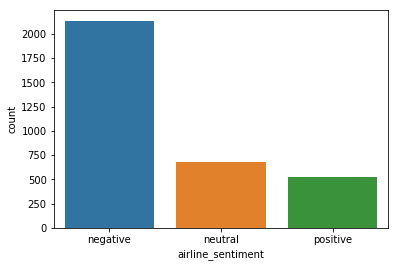

In [26]:
sns.countplot(x='airline_sentiment',data=data,order=['negative','neutral','positive'])
plt.show()

c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


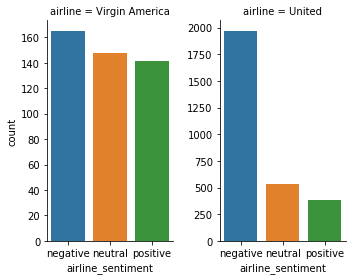

In [10]:
#Visualizing 'airline_sentiment' and 'airline'
sns.factorplot(x = 'airline_sentiment',data=data,
               order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


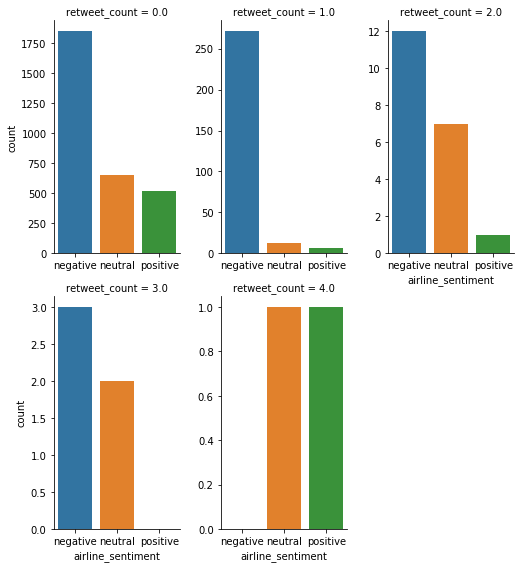

In [27]:
# Visualizing 'airlinee_sentiment' and 'tweet_count'
sns.factorplot(x= 'airline_sentiment',data=data,
              order=['negative','neutral','positive'],kind = 'count',col_wrap=3,col='retweet_count',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\program files\alteryx\bin\miniconda3\pythontool_venv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


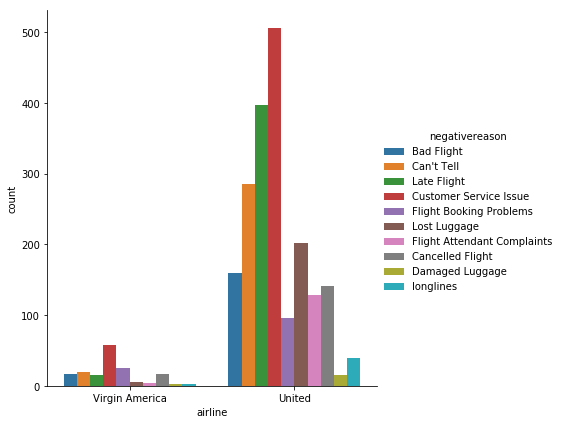

In [28]:
#Visualizing 'negativereason' and 'airline'
sns.factorplot(x = 'airline',data=data,
               order = ['Virgin America','United'],kind ='count',hue='negativereason',size=6,aspect=0.9)
plt.show()

# 3.3 Data Preprocessing Tf-IDF Vectorizer

In [29]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
data=data.drop(["tweet_id",
           "airline",
           "name",
           "retweet_count",
           "tweet_created",
           "tweet_location",
           "user_timezone"],axis=1)


In [31]:
#remove words which are starts with @ symbols
data['text'] = data['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))


# 3.4 Data Transformation Stop Word Removal
1. Appending negative reason to text
2. For data['negativereason'] i have removed the NaN values by 0 in 'negativereason' and placed 1 in place of vaild negative reason.
3. For data['negativereason_confidence'] the values are between 0 to 1 higher the values more its chances to be a 'negative' tweet lower the values more its chances to be 'positive' or 'neutral' tweet.
so replacing the NaN by value near to zero

In [32]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0,None,None,What said.
1,positive,0.3486,None,0.0,plus you've added commercials to the experien...
2,neutral,0.6837,None,None,I didn't today... Must mean I need to take an...
3,negative,1.0,Bad Flight,0.7033,"it's really aggressive to blast obnoxious ""en..."
4,negative,1.0,Can't Tell,1.0,and it's a really big bad thing about it


In [33]:
#appending negative reason to text
data=data.values
for i in range(3339):
    if not str(data[i][2])=="nan":
        data[i][4]=str(data[i][4])+" "+ str(data[i][2])

In [34]:
#Getting important numeric data 
for i in range(3339):
    if str(data[i][2])=="nan":
        data[i][2]=0
    if str(data[i][3])=="nan":
        data[i][3]=0.3
for i in range(3339):
    if not str(data[i][2])=='0':
        data[i][2]=1


In [35]:
import pandas as pd

In [36]:
data=pd.DataFrame(data=data,columns=["airline_sentiment","airline_sentiment_confidence","negativereason","negativereason_confidence","text"])
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,text
0,neutral,1.0,1,None,What said. None
1,positive,0.3486,1,0.0,plus you've added commercials to the experien...
2,neutral,0.6837,1,None,I didn't today... Must mean I need to take an...
3,negative,1.0,1,0.7033,"it's really aggressive to blast obnoxious ""en..."
4,negative,1.0,1,1.0,and it's a really big bad thing about it Can'...


In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tlam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()

In [39]:
#preparing target variable
y=data['airline_sentiment']
y=pd.DataFrame(y,columns=['airline_sentiment'])
y = y['airline_sentiment'].map({'neutral':1,'negative':2,'positive':0})

# 3.5 Model Training: Keras CNN

In [40]:
#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

In [41]:
# Transforming our target vatiable
from sklearn.preprocessing import OneHotEncoder

In [42]:
onehotencoder=OneHotEncoder()
target=y.values
target=target.reshape(-1,1)
target=onehotencoder.fit_transform(target).toarray()

In [43]:
target=pd.DataFrame(data=target,columns=['positive','neutral','negative'])
target.head()

,positive,neutral,negative
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [45]:
clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=6208))
clf.add(Dropout(0.5))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
#adding output layer
clf.add(Dense(units=3,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting ANN
hist=clf.fit(x_features,target,batch_size=32,epochs=2)


Epoch 1/2
3339/3339 [==============================] - 68s 20ms/step - loss: 4.1382 - acc: 0.7975
Epoch 2/2
3339/3339 [==============================] - 65s 20ms/step - loss: 0.5148 - acc: 0.9221


# 3.6 Model Evaluation with Graph

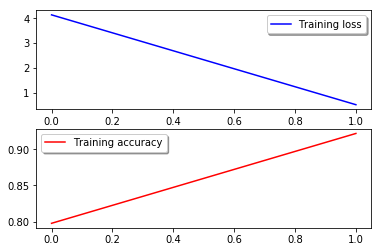

In [46]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Alteryx X IPython Demo: 
# Deep Learn NLP Airline Sentiment Classification

### 2018 
#### Internal reference only

### Agenda

**Part 1 Encode_Vectorizer**
- 1.1 Background
- 1.2 Encoding
- 1.3 Encode with Sckit Learn
- 1.4 One Hot Encoding with Kera 
- 1.5 Vectorize Text with Count & TF-IDF
- 1.6 Word Embeding 

**Part 2: Simple Demo using Keras**
- 2.1 Sequence Length with Paddling
- 2.2 Neural Netork Model

**Part 3: Airline Twitter Sentiment Analysis**
- 3.1 Import Data to Alteryx 
- 3.2 Vizualizing Data Understanding
- 3.3 Data Preprocessing Tf-IDF Vectorizer
- 3.4 Data Transformation Stop Word Removal
- 3.5 Model Training: Keras CNN
- 3.6 Model Evaluation with Graph


**Part 4: Scoring & Export Alteryx Output (To be Built)**
- 4.1 Scoring Data Import & Prep
- 4.2 Predict New Data with Built Model
- 4.3 Write to Alteryx output



# 1.1 Background

### Problem Description
Given dataset contains data of tweets on various airline’s twitter handles.

It contains a total of 12 columns, out of which one column specifies the sentiment of the tweet. All other columns provide various information related to what was the tweet, where was it posted from, when was it posted, it's retweeted; etc.

Before we goes into the real data analysis. It's crucial to understand what's the difference between traditional NLP & deep learning based NLP technique. 

Lets start with encoding. If audience have the experience, jump to Part 3

# 1.2 Encoding

A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

## Why Use a One Hot Encoding?

A one hot encoding allows the representation of categorical data to be more expressive.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

## Integer Encoding
We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

# 1.3 Encode with Sckit Learn
Now that we have seen how to roll our own one hot encoding from scratch, let’s see how we can use the scikit-learn library to perform this mapping automatically for cases where the input sequence fully captures the expected range of input values:

cold, cold, warm, cold, hot, hot, warm, cold, warm, hot

from ayx import Alteryx

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

# 1.4 One Hot Encoding with Kera 

You may have a sequence that is already integer encoded.

You could work with the integers directly, after some scaling. Alternately, you can one hot encode the integers directly. This is important to consider if the integers do not have a real ordinal relationship and are really just placeholders for labels.

The Keras library offers a function called to_categorical() that you can use to one hot encode integer data.

In this example, we have 4 integer values [0, 1, 2, 3] and we have the input sequence of the following 10 numbers:

from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# invert encoding
inverted = argmax(encoded[0])
print(inverted)

# 1.5 Vectorize Text with Count & TF-IDF

#### Word Counts with CountVectorizer

The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

Because these vectors will contain a lot of zeros, we call them sparse. Python provides an efficient way of handling sparse vectors in the scipy.sparse package.

The vectors returned from a call to transform() will be sparse vectors, and you can transform them back to numpy arrays to look and better understand what is going on by calling the toarray() function.

Below is an example of using the CountVectorizer to tokenize, build a vocabulary, and then encode a document.

from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

print(vectorizer.vocabulary_)

#### TF-IDF Vectorizer

Word counts are a good starting point, but are very basic.

One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very meaningful in the encoded vectors.

An alternative is to calculate word frequencies, and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.
Without going into the math, TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Alternately, if you already have a learned CountVectorizer, you can use it with a TfidfTransformer to just calculate the inverse document frequencies and start encoding documents.

The same create, fit, and transform process is used as with the CountVectorizer.

Below is an example of using the TfidfVectorizer to learn vocabulary and inverse document frequencies across 3 small documents and then encode one of those documents.m

from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

# 1.6 Word Embeding 

## Word Embedding Model
Recently, the field of natural language processing has been moving away from bag-of-word models and word encoding toward word embeddings. The benet of word embeddings is that they encode each word into a dense vector that captures something about its relative meaning within the training text. This means that variations of words like case, spelling, punctuation, and so on will automatically be learned to be similar in the embedding space.

Word embedding is an approach to provide a ** dense vector representation ** of words that capture
something about their meaning. 

Word embeddings are an improvement over simpler bag-of-word
model word encoding schemes like word counts and frequencies that result in ** large and sparse
vectors (mostly 0 values) ** that describe documents but not the meaning of the words.


Word embeddings work by using an algorithm to train a set of ** fixed-length dense ** and
** continuous-valued vectors ** based on a large corpus of text. Each word is represented by a
point in the embedding space and these points are learned and moved around based on the
words that surround the target word. 



## Gensim
Gensim is an open source Python library for natural language processing, with a focus on topic
modeling. It is billed as \topic modeling for humans". Gensim was developed and is maintained
by the Czech natural language processing researcher Radim Rehurek. Most notably for this tutorial, it supports an implementation of the Word2Vec word embedding
for learning new word vectors from text.

## Word2Vec

Word2Vec is one algorithm for learning a word embedding from a text corpus. There are two
main training algorithms that can be used to learn the embedding from text; they are 

$$ Continuous-Bag-of-Words(CBOW) $$

$$ Skip grams $$

The approach was developed by Tomas Mikolov, formerly at Google
and currently at Facebook.



import gensim

There are many parameters on this constructor; a few noteworthy arguments you may
wish to configure are:


- **size**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).

- **window**: (default 5) The maximum distance between a target word and words around the target word.

- **min count**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
- **workers**: (default 3) The number of threads to use while training.

- **sg**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

from gensim.models import Word2Vec

#defining data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

print (model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)



# access vector for one word
print(model['sentence'])

# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

# Part 2: Simple Demo using Keras (Optional) 
In this section, we will look at how we can learn a word embedding while tting a neural
network on a text classication problem. We will dene a small problem where we have 10
text documents, each with a comment about a piece of work a student submitted. Each text
document is classied as positive 1 or negative 0. This is a simple sentiment analysis problem.
First, we will dene the documents and their class labels.

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

Next, we can ** integer encode ** each document. 

This means that as input the Embedding layer will have sequences of integers. 

We could experiment with other more sophisticated bag of word model encoding like counts or ** TF-IDF **. 

Keras provides the ** one hot()** function that creates a hash of each word as an effcient integer encoding. 

We will estimate the ** vocabulary size ** of 50, which is much larger than needed to reduce the probability of collisions from the hash function.

# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

# 2.1 Sequence Length with Paddling

The sequences have dierent lengths and Keras prefers inputs to be vectorized and all inputs
to have the same length. We will pad all input sequences to have the length of 4. Again, we can
do this with a built in Keras function, in this case the pad sequences() function.

# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

# 2.2 Neural Netork Model

We are now ready to dene our Embedding layer as part of our neural network model.
The Embedding layer has a vocabulary of 50 and an input length of 4. 

We will choose a small embedding space of ** 8 dimensions. ** The model is a simple binary classication model.


Importantly, the output from the Embedding layer will be 4 vectors of 8 dimensions each, one for each word. We  flatten this to a one 32-element vector to pass on to the Dense output layer.

$$ 4 * 8 = 32 $$

# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

# fit the model
model.fit(padded_docs, labels, epochs=40, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

You could save the learned weights from the Embedding layer to le for later use in other
models. You could also use this model generally to classify other documents that have the
same kind vocabulary seen in the test dataset.

# Part 3: Airline Twitter Sentiment Anlaysis

### Data Description
Description of columns of the dataset is given below -

tweet_id -- Id of the tweet

airline_sentiment -- Sentiment of the tweet (Target variable)

airline_sentiment_confidence -- Confidence with which the given sentiment was determined

negativereason_confidence -- Confidence with which the negative reason of tweet was predicted

name -- Name of the person who tweeted

retweet_count -- Number of retweets

text -- Text of the tweet whose sentiment has to be predicted

tweet_created -- Time at which the tweet was created

tweet_location -- Location from where the tweet was posted

user_timezone -- Time zone from where the tweet was posted

negativereason -- Reason for which user posted a negative tweet

airline -- Airline for which the tweet was posted

## 3.1 Import Data to Alteryx 

data = Alteryx.read("#1")

data

# 3.2 Vizualizing Data Understanding

#looking for null values
(len(data)-data.count())/len(data)

#Visualizing the Data
data.groupby(['airline_sentiment']).size()

data.groupby(['airline']).size()

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='airline_sentiment',data=data,order=['negative','neutral','positive'])
plt.show()

#Visualizing 'airline_sentiment' and 'airline'
sns.factorplot(x = 'airline_sentiment',data=data,
               order = ['negative','neutral','positive'],kind = 'count',col_wrap=3,col='airline',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

# Visualizing 'airlinee_sentiment' and 'tweet_count'
sns.factorplot(x= 'airline_sentiment',data=data,
              order=['negative','neutral','positive'],kind = 'count',col_wrap=3,col='retweet_count',size=4,aspect=0.6,sharex=False,sharey=False)
plt.show()

#Visualizing 'negativereason' and 'airline'
sns.factorplot(x = 'airline',data=data,
               order = ['Virgin America','United'],kind ='count',hue='negativereason',size=6,aspect=0.9)
plt.show()

# 3.3 Data Preprocessing Tf-IDF Vectorizer

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

data=data.drop(["tweet_id",
           "airline",
           "name",
           "retweet_count",
           "tweet_created",
           "tweet_location",
           "user_timezone"],axis=1)


#remove words which are starts with @ symbols
data['text'] = data['text'].map(lambda x:re.sub('@\w*','',str(x)))
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))


# 3.4 Data Transformation Stop Word Removal
1. Appending negative reason to text
2. For data['negativereason'] i have removed the NaN values by 0 in 'negativereason' and placed 1 in place of vaild negative reason.
3. For data['negativereason_confidence'] the values are between 0 to 1 higher the values more its chances to be a 'negative' tweet lower the values more its chances to be 'positive' or 'neutral' tweet.
so replacing the NaN by value near to zero

data.head()

#appending negative reason to text
data=data.values
for i in range(3339):
    if not str(data[i][2])=="nan":
        data[i][4]=str(data[i][4])+" "+ str(data[i][2])

#Getting important numeric data 
for i in range(3339):
    if str(data[i][2])=="nan":
        data[i][2]=0
    if str(data[i][3])=="nan":
        data[i][3]=0.3
for i in range(3339):
    if not str(data[i][2])=='0':
        data[i][2]=1


import pandas as pd

data=pd.DataFrame(data=data,columns=["airline_sentiment","airline_sentiment_confidence","negativereason","negativereason_confidence","text"])
data.head()

import nltk
nltk.download('stopwords')

#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()

#preparing target variable
y=data['airline_sentiment']
y=pd.DataFrame(y,columns=['airline_sentiment'])
y = y['airline_sentiment'].map({'neutral':1,'negative':2,'positive':0})

# 3.5 Model Training: Keras CNN

#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

# Transforming our target vatiable
from sklearn.preprocessing import OneHotEncoder

onehotencoder=OneHotEncoder()
target=y.values
target=target.reshape(-1,1)
target=onehotencoder.fit_transform(target).toarray()

target=pd.DataFrame(data=target,columns=['positive','neutral','negative'])
target.head()

clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=6208))
clf.add(Dropout(0.5))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.5))
#adding output layer
clf.add(Dense(units=3,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#fitting ANN
hist=clf.fit(x_features,target,batch_size=32,epochs=2)


# 3.6 Model Evaluation with Graph

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)